<a href="https://colab.research.google.com/github/Sonja3333333333333/A-B-tests/blob/main/ab_tests_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Формулювання продуктової гіпотези
Проблема: на Djini наам хочеться збільшити відсоток відгуків, які рекрутери прочитали. Тобто це метрика, яку ми хочимо покращити.

Гіпотеза: ми віримо, що якщо рекрутери бачитимуть непрочитанні повідомлення зверху в інбоксі, то вони прочитають більше відгоків та відповідно більше канддатів отримають свої відповіді.

Очікуваний результат: збільшити відсоток прочитаних відгуків та хоча б не зменшити відсоток відповідей рекретерів.

Ризики: (?) Що може піти не так? Що повинно залишатися стабільним при внесенні змін??


# Дані


 1. Скільки рекрутер отримав відгуків за час проведення тесту
 2. Кількість відгуків, які рекрутер прочитав
 3. Кількість відгуків, на які рекрутер відповів.
 4. Колонка з групою, чи рекрутер належав тестовій чи контрольній групі.

In [ ]:
data = pd.read_csv("for_ab_test.csv")
data

,grp,applies,read_applies,answered_applies
0,test,42,7,0
1,test,7,6,6
2,test,2,2,2
3,test,17,14,12
4,test,282,135,58
...,...,...,...,...
2790,control,8,8,3
2791,test,16,16,8
2792,test,5,1,0
2793,control,18,16,0


/tmp/ipython-input-3-10248712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='applies', y='grp', inner='box', palette='Dark2')


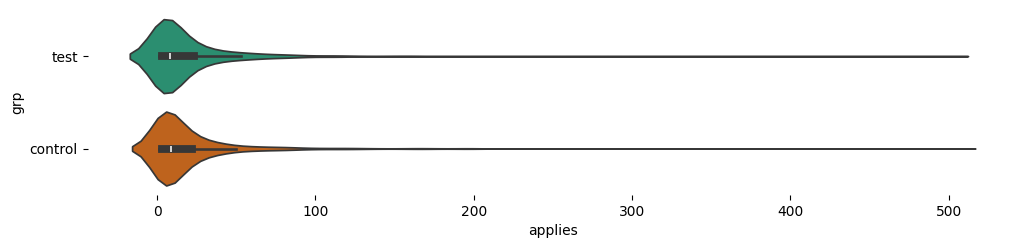

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['grp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='applies', y='grp', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Бачимо, що кількість відгуків користувачів рівномірно роподілена між групами рекретерів.

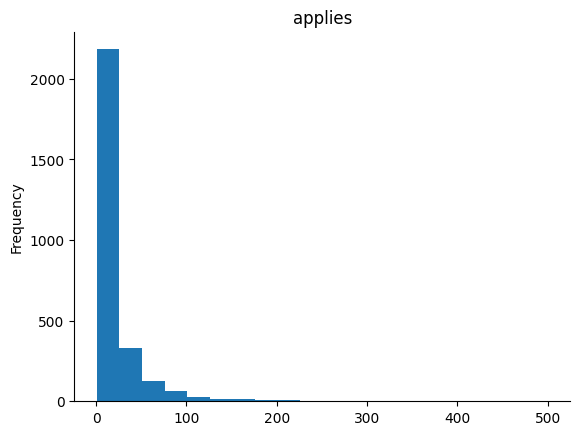

In [ ]:
from matplotlib import pyplot as plt
data['applies'].plot(kind='hist', bins=20, title='applies')
plt.gca().spines[['top', 'right',]].set_visible(False)

Майже всі рекрутери отримали до 250 відгуків.

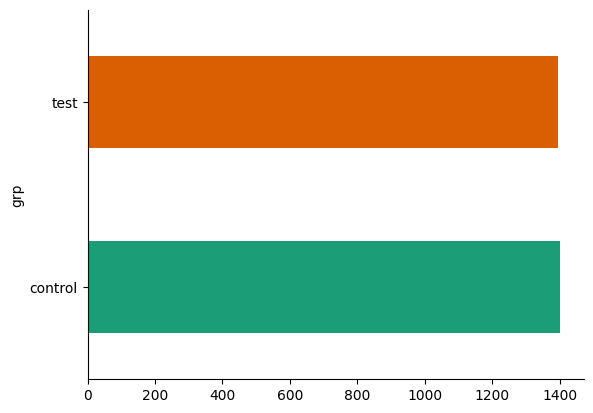

In [ ]:
# @title grp

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('grp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Переконуємося, що дані рівномірно розподілені між групами за кількістю.

In [ ]:
data.describe()

,applies,read_applies,answered_applies
count,2795.000000,2795.000000,2795.000000
mean,20.744544,10.129517,5.292308
std,37.333786,21.084884,14.510162
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,9.000000,4.000000,1.000000
75%,22.000000,11.000000,4.000000
max,500.000000,482.000000,216.000000


In [ ]:
data.groupby('grp').size()

,0
grp,
control,1400
test,1395


In [ ]:
data.groupby('grp').sum()

,applies,read_applies,answered_applies
grp,,,
control,28331,13363,6920
test,29650,14949,7872


Додаємо в калькулятор:

Significant test result!

Variation B's observed conversion rate (50.42%) was 6.89% higher than variation A's conversion rate (47.17%). You can be 95% confident that this result is a consequence of the changes you made and not a result of random chance.

# Option 2

Змінюємо метрику: Рахуємо та порівнюємо середнє частки прочитань серед рекрутерів. Та працюємо саме на покращення цієї метрики. Також звважаємо на те, що частака відгуків на, які відповіли, до прочитаних має хоча б не зменшитись.

In [ ]:
data["read_pct"] = data["read_applies"]/data["applies"]
data

,grp,applies,read_applies,answered_applies,read_pct
0,test,42,7,0,0.166667
1,test,7,6,6,0.857143
2,test,2,2,2,1.000000
3,test,17,14,12,0.823529
4,test,282,135,58,0.478723
...,...,...,...,...,...
2790,control,8,8,3,1.000000
2791,test,16,16,8,1.000000
2792,test,5,1,0,0.200000
2793,control,18,16,0,0.888889


In [ ]:
data["answered_pct"] = data["answered_applies"]/data["applies"]
data

,grp,applies,read_applies,answered_applies,read_pct,answered_pct
0,test,42,7,0,0.166667,0.000000
1,test,7,6,6,0.857143,0.857143
2,test,2,2,2,1.000000,1.000000
3,test,17,14,12,0.823529,0.705882
4,test,282,135,58,0.478723,0.205674
...,...,...,...,...,...,...
2790,control,8,8,3,1.000000,0.375000
2791,test,16,16,8,1.000000,0.500000
2792,test,5,1,0,0.200000,0.000000
2793,control,18,16,0,0.888889,0.000000


In [ ]:
data["answered2read"] = np.where(data["read_applies"] == 0, 0, data["answered_applies"]/data["read_applies"])
data

,grp,applies,read_applies,answered_applies,read_pct,answered_pct,answered2read
0,test,42,7,0,0.166667,0.000000,0.000000
1,test,7,6,6,0.857143,0.857143,1.000000
2,test,2,2,2,1.000000,1.000000,1.000000
3,test,17,14,12,0.823529,0.705882,0.857143
4,test,282,135,58,0.478723,0.205674,0.429630
...,...,...,...,...,...,...,...
2790,control,8,8,3,1.000000,0.375000,0.375000
2791,test,16,16,8,1.000000,0.500000,0.500000
2792,test,5,1,0,0.200000,0.000000,0.000000
2793,control,18,16,0,0.888889,0.000000,0.000000


In [ ]:
data.describe()

,applies,read_applies,answered_applies,read_pct,answered_pct,answered2read
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,20.744544,10.129517,5.292308,0.559519,0.285025,0.377164
std,37.333786,21.084884,14.510162,0.395518,0.358466,0.412878
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.142857,0.000000,0.000000
50%,9.000000,4.000000,1.000000,0.625000,0.078947,0.176471
75%,22.000000,11.000000,4.000000,1.000000,0.500000,0.833333
max,500.000000,482.000000,216.000000,1.000000,1.000000,1.000000


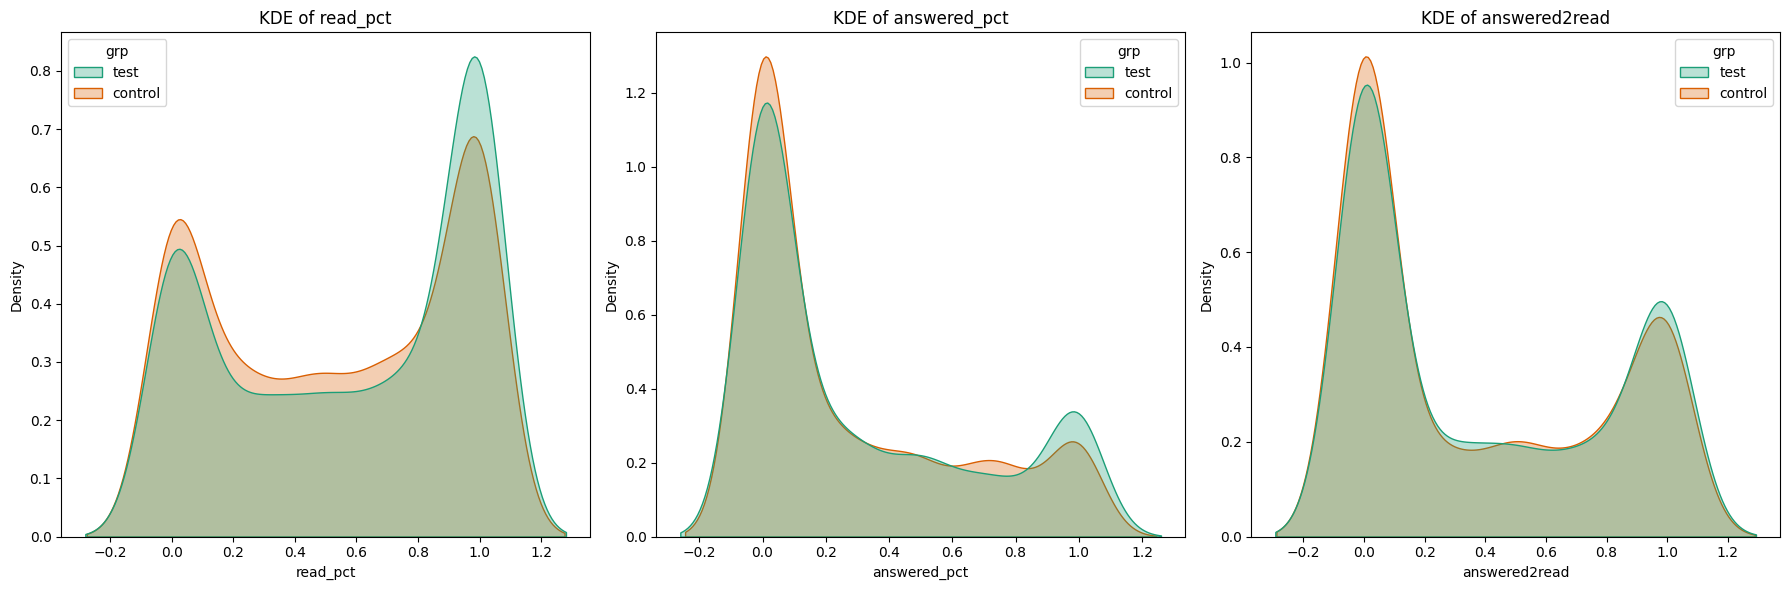

In [ ]:
plt.figure(figsize=(18, 6))

#plot read_pct
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='read_pct', hue='grp', palette="Dark2", fill=True, alpha=0.3)
plt.title('KDE of read_pct')

#plot answered_pct KDE
plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='answered_pct', hue='grp', palette="Dark2", fill=True, alpha=0.3)
plt.title('KDE of answered_pct')

#plot answered2read KDE
plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='answered2read', hue='grp', palette="Dark2", fill=True, alpha=0.3)
plt.title('KDE of answered2read')

plt.tight_layout()
plt.show()


Для усіх метрик в контрольній групі ми маємо більше нулів, а в тестовій більше одиниць. Більша частка рекрутерів у контрольній групі не прочитала чи не відповіла на жодний відгук ніж у тестовій (0%).

Якщо хочемо дізнатися більше вплив кожного рекрутера на середній відсоток прочитань - обираємо гістограму за метрику. Якщо хочумо отримати більше інформації про типовго користувача - обираємо за метрику медіану.

Різниця помітна, перевіряємо чи вона значуща за допомогою bootstrap.

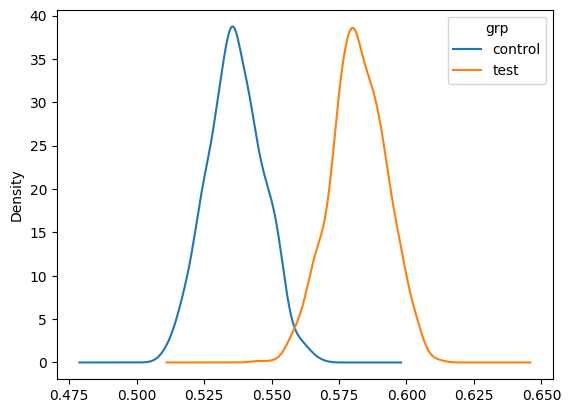

In [ ]:
boot_read_pct = []
# беремо 1000 вибірок із наших даних, а саме середні значення цих вибірок для цгт
for i in range(1000):
  boot_mean = data.sample(frac=1, replace=True).groupby("grp")['read_pct'].mean() #frac = 1 - беремо 100% рядків, тобто вибірка такого самого розміру, replace = True - з поверненням, тому значення можуть повторюватись
  boot_read_pct.append(boot_mean)

boot_read_pct = pd.DataFrame(boot_read_pct)

boot_read_pct.plot(kind="kde") # показуємо розподіл середніх для обох груп
plt.show()

Бачимо, що в тестовій групі середні в нас більші. Нас тепер цікавить наскільки більше.

In [ ]:
# додаємо колонку з різницею середніх
boot_read_pct["diff"] =( boot_read_pct["test"]/boot_read_pct["control"]- 1) * 100 # не абсолютна, а відносна відсоткова різниця, наскільки тестова група краща за контрольну
boot_read_pct

grp,control,test,diff
read_pct,0.549760,0.584262,6.275743
read_pct,0.539727,0.585264,8.437063
read_pct,0.546144,0.561500,2.811568
read_pct,0.537399,0.593066,10.358701
read_pct,0.533832,0.572008,7.151480
...,...,...,...
read_pct,0.527536,0.577103,9.395894
read_pct,0.524725,0.594742,13.343504
read_pct,0.550119,0.596794,8.484500
read_pct,0.521788,0.584612,12.040053


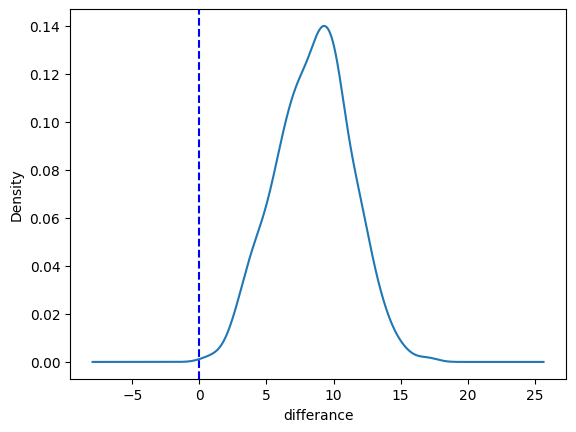

In [ ]:
ax = boot_read_pct['diff'].plot(kind='kde')
ax.set_xlabel("differance")
plt.axvline(0, color="blue", linestyle='--')
plt.show()

Дивимося ймовірність того, що різниця буде більше нуля.

In [ ]:
(boot_read_pct["diff"]>0.0).mean()

np.float64(1.0)

Бачимо, що з ймовірністю 0.999 середнє значення прочитаннь в тестовій групі більше за контрольну. Це є більше за стандартний confidence level - 95%.

Також ми хочемо визначити інтервал довіри - інтревал, куди з ймовірністю 95% попадають наших бутстраптнутих статистик.

In [ ]:
np.percentile(boot_read_pct['diff'], [2.5, 97.5])

array([ 3.0481569 , 13.71189314])

Коли ми говоримо про різницю, нам важливо, щоб довірчий інтервал не перетинав 0.

Ми на 95% впевнені, що різниці у середніх попадають у цей діапазон - [ 2.70678557, 14.36198639].

# Bootstrap Function


In [ ]:
# універсальна функція створення bootstarap для різних метрик
def generate_bootstrat(data, group, metric, func, size=1000):
  boot = []
  for i in range(size):
    sample = data.sample(frac=1, replace=True).groupby(group)[metric].agg(func)
    boot.append(sample)

  boot = pd.DataFrame(boot)
  return boot;

def bootstrap_check(data, group, metric, func, size=1000):
  boot = generate_bootstrat(data, group, metric, func, size)

  #рахуємо різницю (відносну у відсотках) по метриках між контрольною та експериментальної групами
  if 'test' in boot.columns and 'control' in boot.columns:
    boot["diff"] = (boot["test"]/boot["control"] - 1)*100

    # інтервали довіри
    ci_diff = np.percentile(boot["diff"], [2.5, 97.5])
    ci_test = np.percentile(boot["test"], [2.5, 97.5])
    ci_control = np.percentile(boot["control"], [2.5, 97.5])

    print(f"Analyzing test results for {func} {metric}")
    print(f"95% confidence interval for control: {ci_control}")
    print(f"95% confidence interval for test: {ci_test}")
    print(f"95% confidence interval for difference: {ci_diff}")

    # karnel density estimation (ймовірності того, якого значення набуде метрика у нашій вибірці)
    boot["diff"].plot(kind="kde")
    plt.axvline(0, color="blue", linestyle="--")
    ax.set_xlabel("Differance between test and control, in pct")
    plt.show()
  else:
    print("Columns test and control not found in bootstraped data")


### Перевіряємо відсоток прочитання

Analyzing test results for mean read_pct
95% confidence interval for control: [0.51650755 0.55719348]
95% confidence interval for test: [0.56165122 0.60364351]
95% confidence interval for difference: [ 3.39304456 14.39756973]


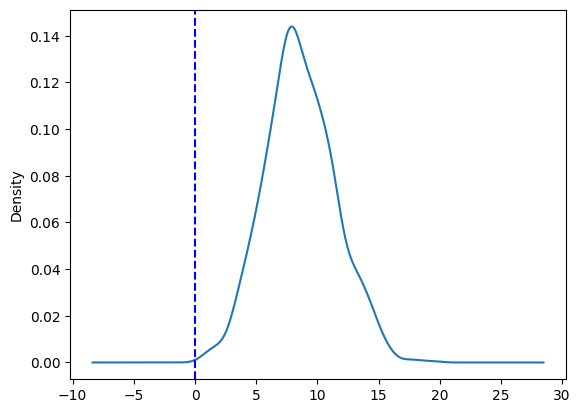

In [ ]:
bootstrap_check(data, "grp", metric="read_pct", func="mean")

Analyzing test results for median read_pct
95% confidence interval for control: [0.5      0.629203]
95% confidence interval for test: [0.625      0.73984962]
95% confidence interval for difference: [ 4.16666667 38.35745797]


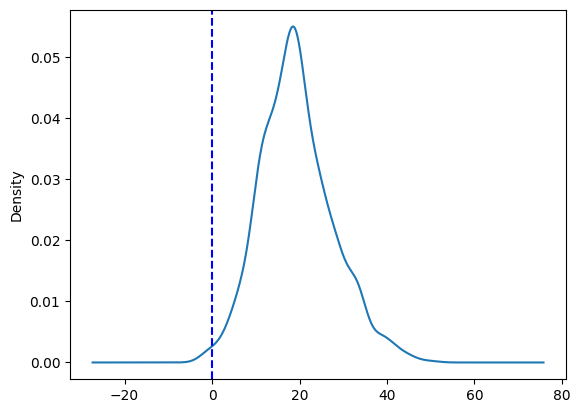

In [ ]:
bootstrap_check(data, "grp", metric="read_pct", func="median")

Analyzing test results for mean answered_pct
95% confidence interval for control: [0.25038159 0.28839115]
95% confidence interval for test: [0.28085095 0.3200187 ]
95% confidence interval for difference: [ 0.86959986 22.37194014]


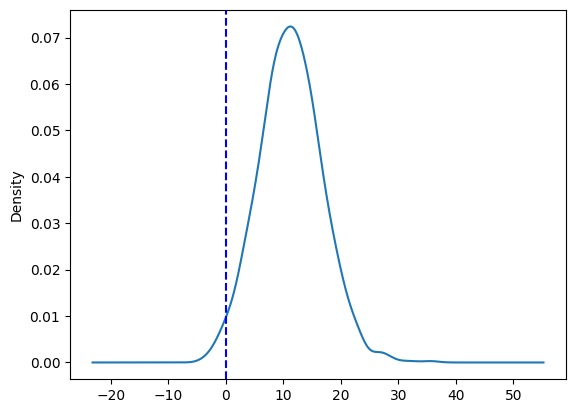

In [ ]:
bootstrap_check(data, "grp", metric="answered_pct", func="mean")

Analyzing test results for mean answered2read
95% confidence interval for control: [0.34558199 0.38836868]
95% confidence interval for test: [0.36445079 0.40750885]
95% confidence interval for difference: [-2.31947562 13.52171908]


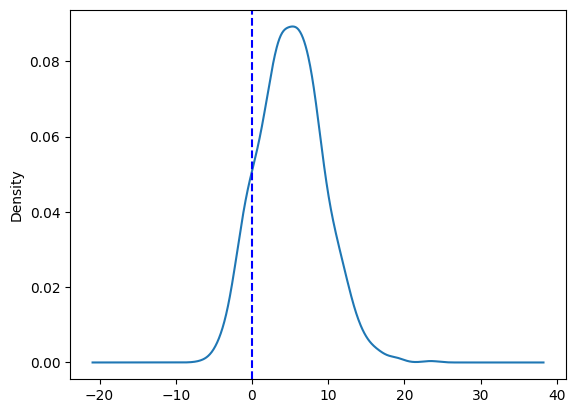

In [ ]:
bootstrap_check(data, "grp", metric="answered2read", func="mean")

## Сегментація користувачів

Дуже часто на тест могла повпливати певна сегментація користувачів. Таку сегментацію теж варто перевіряти.

In [ ]:
data.describe()

,applies,read_applies,answered_applies,read_pct,answered_pct,answered2read
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,20.744544,10.129517,5.292308,0.559519,0.285025,0.377164
std,37.333786,21.084884,14.510162,0.395518,0.358466,0.412878
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.142857,0.000000,0.000000
50%,9.000000,4.000000,1.000000,0.625000,0.078947,0.176471
75%,22.000000,11.000000,4.000000,1.000000,0.500000,0.833333
max,500.000000,482.000000,216.000000,1.000000,1.000000,1.000000


In [ ]:
data.groupby("grp").size()

,0
grp,
control,1400
test,1395


Кількість однаково розподілена по обох групах.

Додаємо до dataframe колонку, яка буде показувати популярність рекрутера за кількістю відгуків, які він отримав за період тесту.

In [ ]:
data["popularity"] = pd.cut(
    data["applies"]
    , bins=[0, 9, 24, float("inf")]
    , labels=["1-9", "10-24", "25+"]
)

In [ ]:
data

,grp,applies,read_applies,answered_applies,read_pct,answered_pct,answered2read,popularity
0,test,42,7,0,0.166667,0.000000,0.000000,25+
1,test,7,6,6,0.857143,0.857143,1.000000,1-9
2,test,2,2,2,1.000000,1.000000,1.000000,1-9
3,test,17,14,12,0.823529,0.705882,0.857143,10-24
4,test,282,135,58,0.478723,0.205674,0.429630,25+
...,...,...,...,...,...,...,...,...
2790,control,8,8,3,1.000000,0.375000,0.375000,1-9
2791,test,16,16,8,1.000000,0.500000,0.500000,10-24
2792,test,5,1,0,0.200000,0.000000,0.000000,1-9
2793,control,18,16,0,0.888889,0.000000,0.000000,10-24


Pivot таблиця з обрахунками для кожної метрики та кожної функції.

In [ ]:
def pivot_diff(value, func):
    pivot_df = data.pivot_table(
        index = "popularity" #Rows
        , columns="grp" #Columns
        , values=value #Values to aggregate
        , aggfunc=func  # Aggregation function
        , observed=False
    ).fillna(0)

    column_totals = data.groupby("grp")[value].agg(func).reindex(pivot_df.columns).fillna(0).to_frame().T
    column_totals.index = [f"Total {value}, {func}"]
    pivot_df = pd.concat([pivot_df, column_totals])

    pivot_df["diff_pct"] = (pivot_df["test"]/pivot_df['control'] - 1) * 100

    return pivot_df

In [ ]:
pivot_diff("applies", "count")

grp,control,test,diff_pct
1-9,730,742,1.643836
10-24,358,330,-7.821229
25+,312,323,3.525641
"Total applies, count",1400,1395,-0.357143


In [ ]:
pivot_diff("read_pct", "mean")

grp,control,test,diff_pct
1-9,0.561706,0.604868,7.683988
10-24,0.541927,0.597486,10.252241
25+,0.471029,0.516585,9.671408
"Total read_pct, mean",0.536440,0.582680,8.619790


In [ ]:
def ab_chart(a):
  a[['control', 'test']][:-1].plot(kind="bar")
  plt.title(a.index[-1])
  plt.show()
  return a

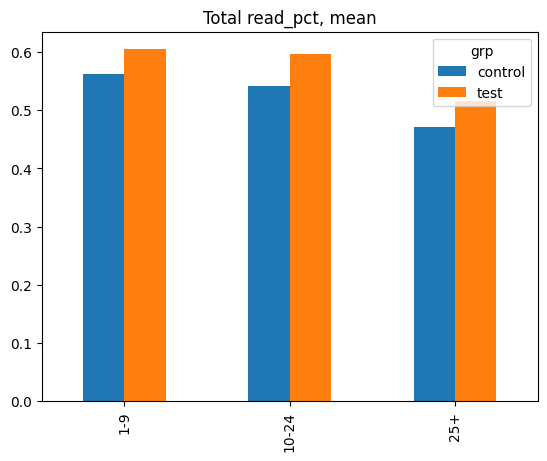

grp,control,test,diff_pct
1-9,0.561706,0.604868,7.683988
10-24,0.541927,0.597486,10.252241
25+,0.471029,0.516585,9.671408
"Total read_pct, mean",0.536440,0.582680,8.619790


In [ ]:
ab_chart(pivot_diff("read_pct", "mean"))

Read rate всюди відрізняється і не виглядає візуально, що якась група на це вплинула.

## Що більше впливає на досліджувану метрику, тест чи сегментація?

In [ ]:
#ANOVA (Analysis of variance)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("read_pct ~ C(grp) * C(popularity)", data=data).fit()

anova_table = sm.stats.anova_lm(model, type=2)

print(anova_table)

                          df      sum_sq   mean_sq          F    PR(>F)
C(grp)                   1.0    1.494021  1.494021   9.647126  0.001916
C(popularity)            2.0    3.642104  1.821052  11.758815  0.000008
C(grp):C(popularity)     2.0    0.018292  0.009146   0.059057  0.942654
Residual              2789.0  431.923926  0.154867        NaN       NaN


Бачимо, що p-value для групи та популярності є менше 5% - рівня значущості, тому робимо висновок, що ці значення мають вплив на нашу метрику. Взаємодії між групою та популярністю немає. Тобто ефект тесту є стабільним незалежно від сегменту.